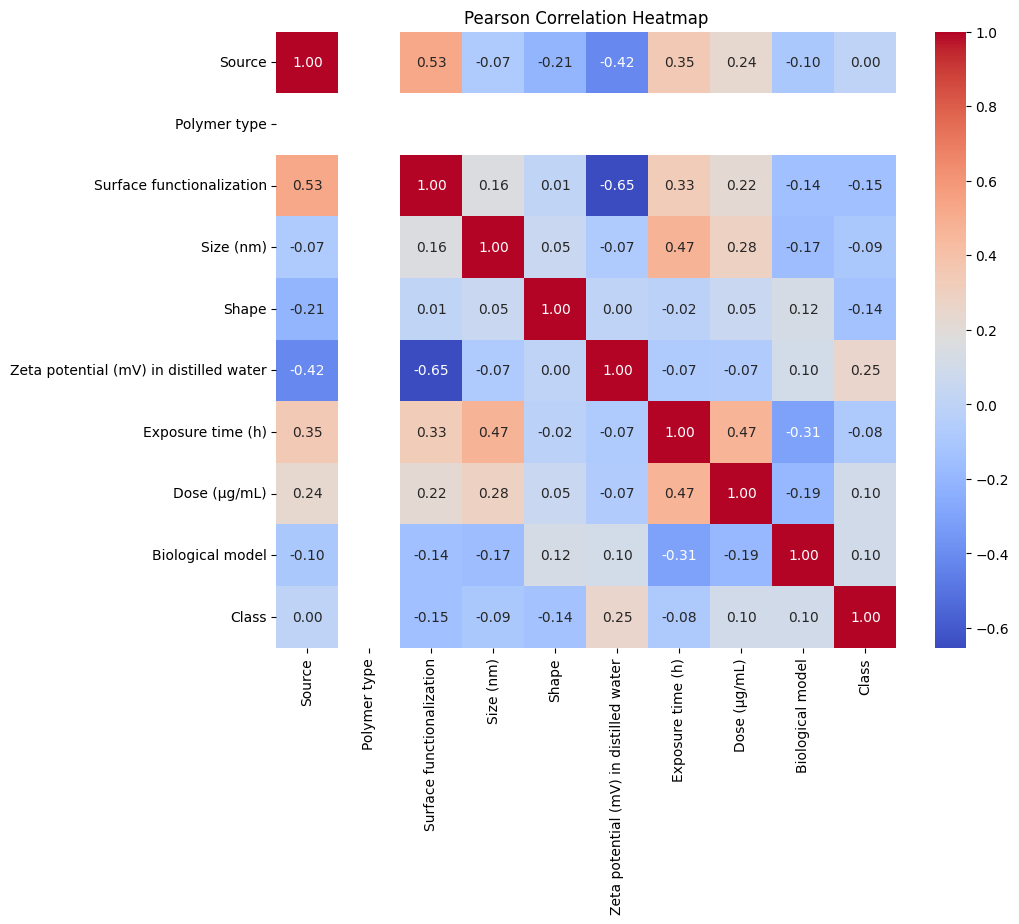

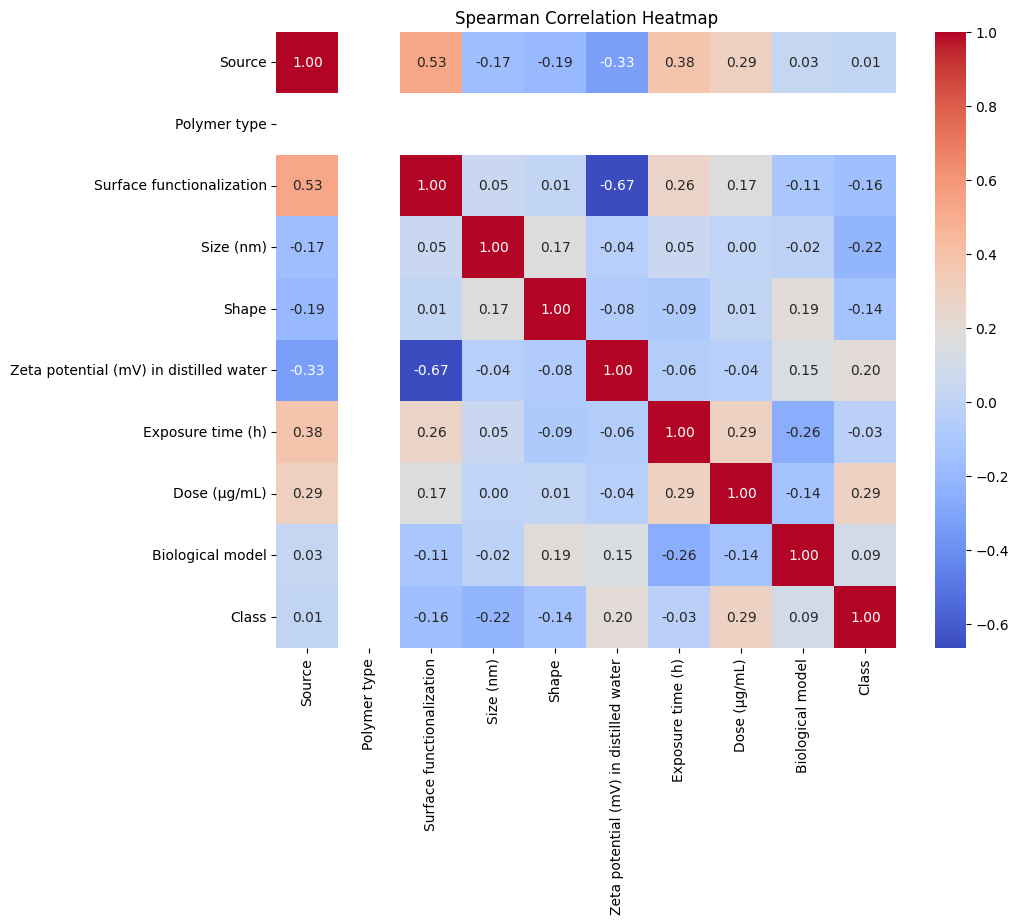

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "/content/1-s2.0-S2772416622001310-mmc1 (1).xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Step 2: Data Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Article ID", "Particle ID", "Reference DOI"])

# Convert "Zeta potential (mV) in distilled water" to numeric and handle missing values
df_cleaned["Zeta potential (mV) in distilled water"] = pd.to_numeric(
    df_cleaned["Zeta potential (mV) in distilled water"], errors="coerce"
)

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 3: Compute Pearson Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Step 4: Compute Spearman Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


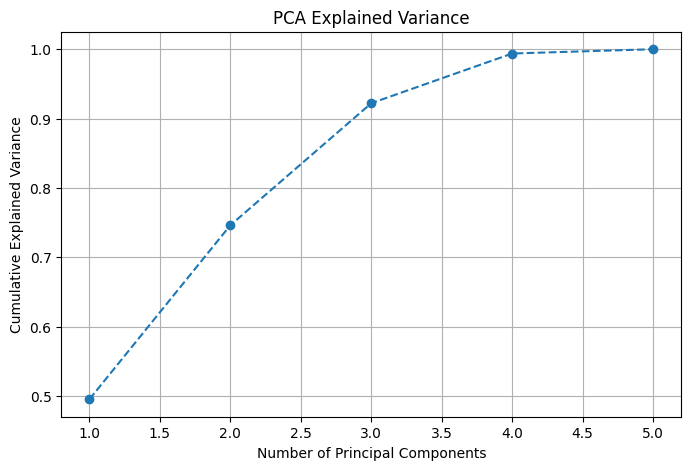

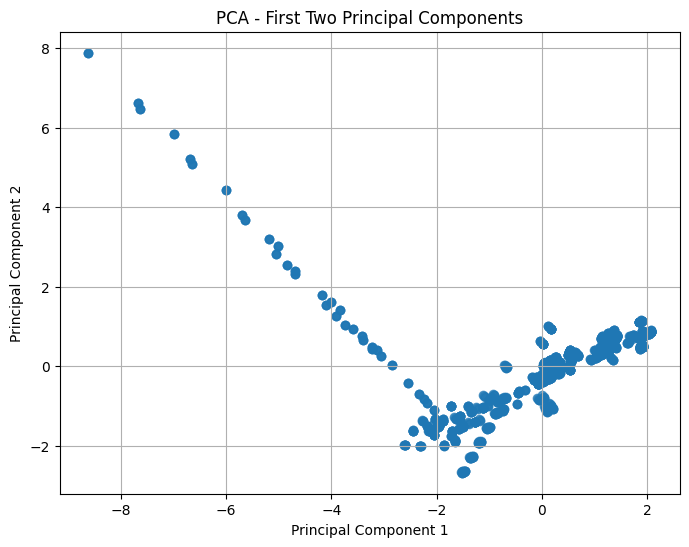

Principal Component 1: 49.54% variance explained
Principal Component 2: 25.08% variance explained
Principal Component 3: 17.59% variance explained
Principal Component 4: 7.17% variance explained
Principal Component 5: 0.62% variance explained


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_excel("/content/1-s2.0-S2772416622001310-mmc1 (1).xlsx")  # Replace with your actual dataset

# Dropping non-numeric columns if necessary
df_numeric = df.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Applying PCA
pca = PCA(n_components=len(df_numeric.columns))  # Retaining all components
pca_result = pca.fit_transform(df_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(df_numeric.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid()
plt.show()

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2%} variance explained")

# Converting PCA results to DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(len(df_numeric.columns))])


Top Contributing Features:
                                  Feature  Importance
0                               Size (nm)    0.496336
1  Zeta potential (mV) in distilled water    0.489564
4                                  Source    0.425823
3                            Dose (μg/mL)    0.368436
2                       Exposure time (h)    0.304476
5                            Polymer type    0.000000


<ipython-input-24-edf446fdc99e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_ranking["Feature"], x=feature_ranking["Importance"], palette="coolwarm")


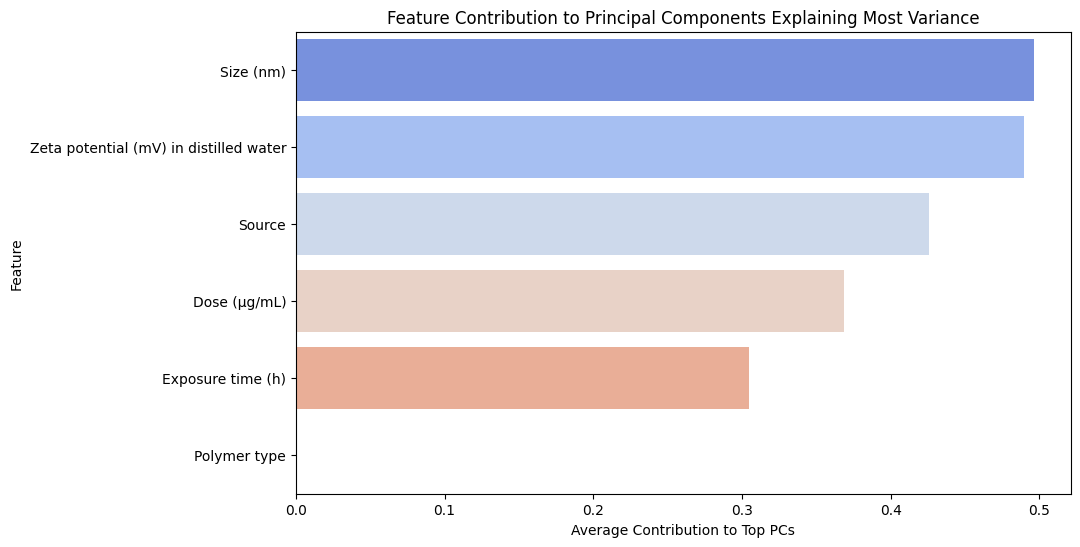

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load your dataset (Assuming df_cleaned is preprocessed)
selected_features = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)", "Source", "Polymer type"]
X = df_cleaned[selected_features]

# Step 2: Standardize the features (PCA works best on scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA(n_components=len(selected_features))  # Keep all components initially
principal_components = pca.fit_transform(X_scaled)

# Step 4: Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 5: Get feature loadings (how much each feature contributes to each PC)
loadings = pca.components_

# Step 6: Identify the top principal components contributing the most variance
top_pc_indices = np.argsort(explained_variance)[::-1][:3]  # Select top 3 PCs

# Step 7: Identify the most influential features in these PCs
feature_importance = np.abs(loadings[top_pc_indices, :])  # Absolute contribution
feature_importance_avg = np.mean(feature_importance, axis=0)  # Average across top PCs

# Step 8: Rank features based on importance
feature_ranking = pd.DataFrame({"Feature": selected_features, "Importance": feature_importance_avg})
feature_ranking = feature_ranking.sort_values(by="Importance", ascending=False)

# Step 9: Print or visualize the results
print("Top Contributing Features:")
print(feature_ranking)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_ranking["Feature"], x=feature_ranking["Importance"], palette="coolwarm")
plt.xlabel("Average Contribution to Top PCs")
plt.ylabel("Feature")
plt.title("Feature Contribution to Principal Components Explaining Most Variance")
plt.show()


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Convert X_train to DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=selected_features)

# Add constant for intercept
X_train_const = sm.add_constant(X_train_df)

# Ensure indices are aligned
X_train_const, y_train = X_train_const.align(y_train, join='inner', axis=0)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_const).fit(disp=False)  # Suppress training logs

# Extract p-values
p_values = logit_model.pvalues

# Convert to DataFrame for better readability
p_values_df = pd.DataFrame({'Feature': p_values.index, 'P-Value': p_values.values})

# Display p-values
print(p_values_df)


LinAlgError: Singular matrix

[0]	validation_0-logloss:0.38774
[1]	validation_0-logloss:0.35973
[2]	validation_0-logloss:0.33939
[3]	validation_0-logloss:0.31981
[4]	validation_0-logloss:0.30270
[5]	validation_0-logloss:0.28921
[6]	validation_0-logloss:0.27467
[7]	validation_0-logloss:0.26265
[8]	validation_0-logloss:0.24982
[9]	validation_0-logloss:0.23880
[10]	validation_0-logloss:0.22911
[11]	validation_0-logloss:0.22243
[12]	validation_0-logloss:0.21653
[13]	validation_0-logloss:0.21115
[14]	validation_0-logloss:0.20525
[15]	validation_0-logloss:0.20103


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[16]	validation_0-logloss:0.19540
[17]	validation_0-logloss:0.19088
[18]	validation_0-logloss:0.18867
[19]	validation_0-logloss:0.18483
[20]	validation_0-logloss:0.18129
[21]	validation_0-logloss:0.17834
[22]	validation_0-logloss:0.17549
[23]	validation_0-logloss:0.17203
[24]	validation_0-logloss:0.16875
[25]	validation_0-logloss:0.16705
[26]	validation_0-logloss:0.16495
[27]	validation_0-logloss:0.16332
[28]	validation_0-logloss:0.16327
[29]	validation_0-logloss:0.16084
[30]	validation_0-logloss:0.16002
[31]	validation_0-logloss:0.15833
[32]	validation_0-logloss:0.15623
[33]	validation_0-logloss:0.15600
[34]	validation_0-logloss:0.15434
[35]	validation_0-logloss:0.15315
[36]	validation_0-logloss:0.15207
[37]	validation_0-logloss:0.15054
[38]	validation_0-logloss:0.14921
[39]	validation_0-logloss:0.14809
[40]	validation_0-logloss:0.14701
[41]	validation_0-logloss:0.14561
[42]	validation_0-logloss:0.14455
[43]	validation_0-logloss:0.14434
[44]	validation_0-logloss:0.14306
[45]	validatio

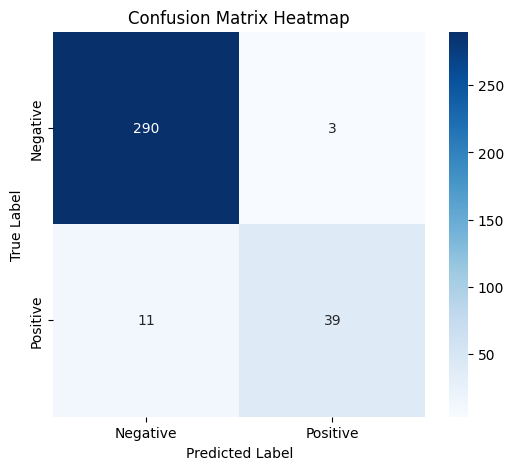

In [ ]:
#FINAL CODE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

# Step 1: Load the dataset
file_path = "1-s2.0-S2772416622001310-mmc1.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Step 2: Data Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Article ID", "Particle ID", "Reference DOI"])

# Convert "Zeta potential (mV) in distilled water" to numeric  string  to numeric and missing values to Nan
df_cleaned["Zeta potential (mV) in distilled water"] = pd.to_numeric(df_cleaned["Zeta potential (mV) in distilled water"], errors="coerce")

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 3: Feature Selection (Based on reference model)
selected_features = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)", "Source", "Polymer type"]
X = df_cleaned[selected_features]
y = df_cleaned["Class"]

# Step 4: Train-Test Split (70% Train, 30% Test)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# to make sure balanced training and test splitting

# Step 5: Fine-Tuned XGBoost Model: log loss for binary classification in probablistic models
best_model = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss", random_state=42,
    n_estimators=500, learning_rate=0.1, verbosity=1, early_stopping_rounds=10
)

# Fit model with early stopping
best_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)])

# Step 6: Make Predictions
y_pred = best_model.predict(X_train_eval) # for precision,recall, f1-score and accuracy
y_prob = best_model.predict_proba(X_train_eval)[:, 1] #for calculation of auroc score

# Step 7: Compute Evaluation Metrics
accuracy = accuracy_score(y_train_eval, y_pred)
precision = precision_score(y_train_eval, y_pred)
recall = recall_score(y_train_eval, y_pred)
f1 = f1_score(y_train_eval, y_pred)
auroc = roc_auc_score(y_train_eval, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")

# Step 8: Plot Confusion Matrix Heatmap
cm = confusion_matrix(y_train_eval, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()



Top Features based on SHAP values:
                                  Feature  Importance
1  Zeta potential (mV) in distilled water    0.252814
3                            Dose (μg/mL)    0.109016
4                                  Source    0.089044
0                               Size (nm)    0.066770
2                       Exposure time (h)    0.021598
5                            Polymer type    0.000000


<ipython-input-15-402d646bbc85>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=shap_feature_importance_df, palette="viridis")


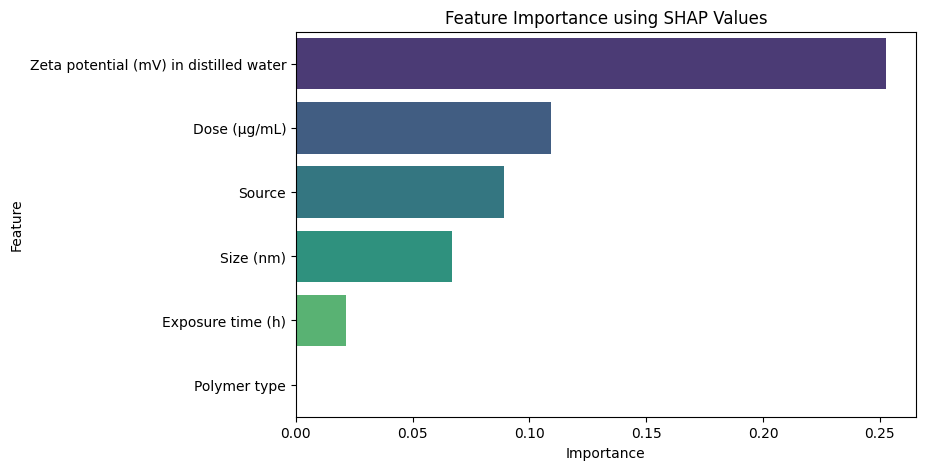

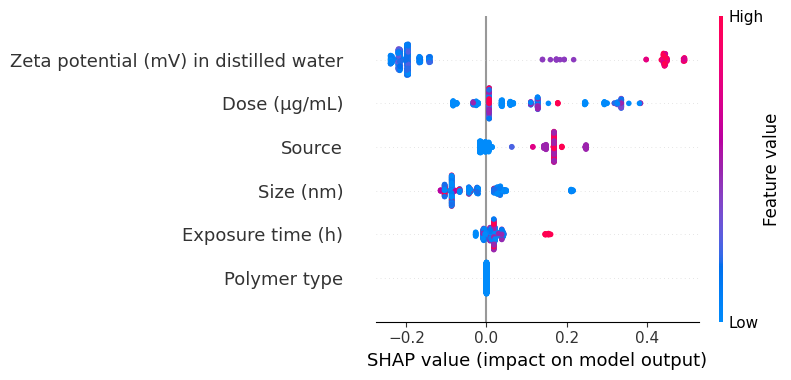

In [ ]:
import shap

# Step 9: Compute SHAP Values using TreeExplainer (Optimized for XGBoost)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_eval)

# Step 10: Compute SHAP Feature Importance
shap_importance = np.abs(shap_values).mean(axis=0)

# Step 11: Create DataFrame for feature importance
shap_feature_importance_df = pd.DataFrame({
    "Feature": selected_features,  # Use original feature names
    "Importance": shap_importance
})

# Sort features by SHAP importance
shap_feature_importance_df = shap_feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("\nTop Features based on SHAP values:")
print(shap_feature_importance_df)

# Step 12: Plot SHAP Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=shap_feature_importance_df, palette="viridis")
plt.title("Feature Importance using SHAP Values")
plt.show()

# Step 13: SHAP Summary Plot (Using Correct Feature Names)
shap.summary_plot(shap_values, features=X_train_eval, feature_names=selected_features)


                                  Feature  Importance
3                            Dose (μg/mL)    0.272044
4                                  Source    0.246727
0                               Size (nm)    0.223171
1  Zeta potential (mV) in distilled water    0.199770
2                       Exposure time (h)    0.058288
5                            Polymer type    0.000000


<ipython-input-11-900d68ffc4aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


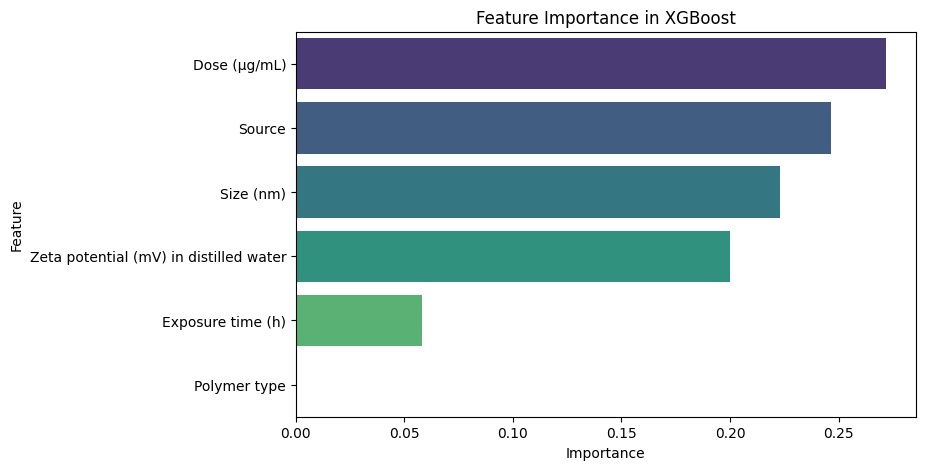

In [ ]:
# Get feature importances
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in XGBoost")
plt.show()


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.113448
Accuracy: 0.9592
Precision: 0.9091
Recall: 0.8000
F1 Score: 0.8511
AUROC: 0.9837


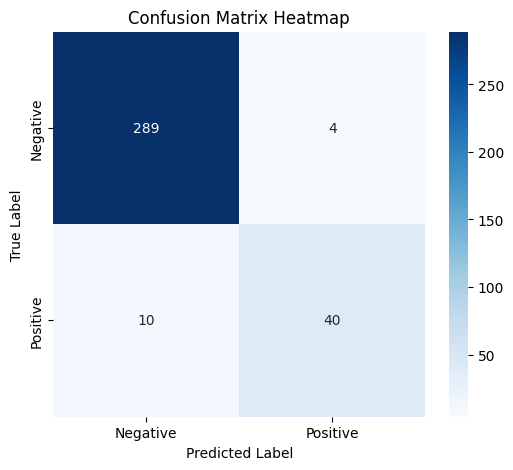

<Figure size 1000x600 with 0 Axes>

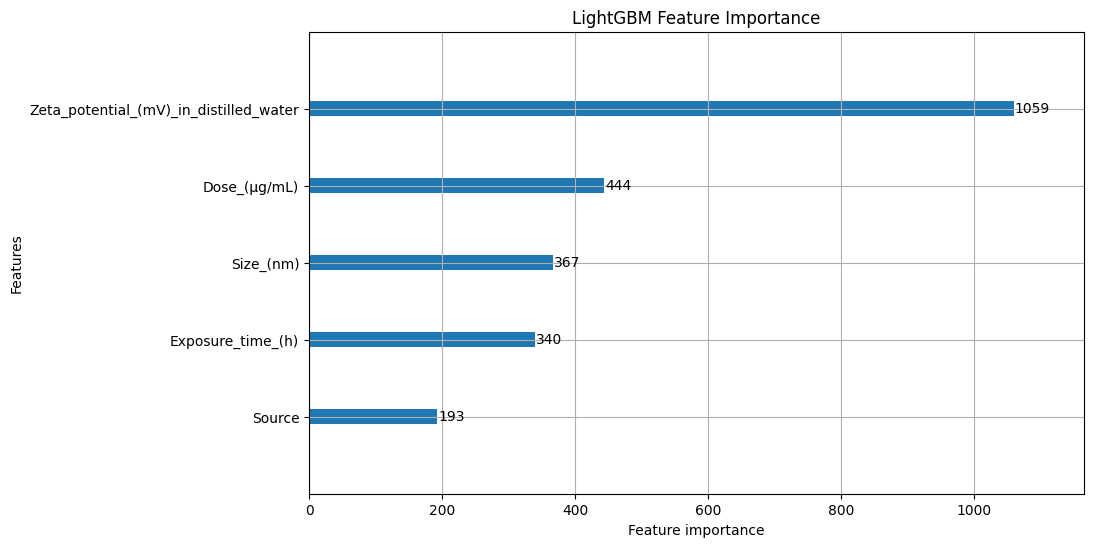

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import lightgbm as lgbm

# Step 1: Load the dataset
file_path = "/content/1-s2.0-S2772416622001310-mmc1 (1).xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Step 2: Data Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Article ID", "Particle ID", "Reference DOI"])

# Convert "Zeta potential (mV) in distilled water" to numeric and missing values to NaN
df_cleaned["Zeta potential (mV) in distilled water"] = pd.to_numeric(
    df_cleaned["Zeta potential (mV) in distilled water"], errors="coerce")

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 3: Feature Selection (Based on reference model)
selected_features = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)", "Source", "Polymer type"]
X = df_cleaned[selected_features]
y = df_cleaned["Class"]

# Step 4: Train-Test Split (70% Train, 30% Test)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# to make sure balanced training and test splitting

# Step 5: Create LightGBM datasets
train_data = lgbm.Dataset(X_train_fit, label=y_train_fit)
eval_data = lgbm.Dataset(X_train_eval, label=y_train_eval, reference=train_data)

# Step 6: Define LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'n_estimators': 500,
    'num_leaves': 31,
    'random_state': 42,
    'verbose': -1
}

# Step 7: Train LightGBM model with early stopping
evals_result = {}
best_model = lgbm.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[eval_data],
    callbacks=[
        lgbm.early_stopping(stopping_rounds=10),
        lgbm.record_evaluation(evals_result)
    ]
)

# Step 8: Make Predictions
y_pred = np.round(best_model.predict(X_train_eval))  # for precision, recall, f1-score and accuracy
y_prob = best_model.predict(X_train_eval)  # for calculation of auroc score

# Step 9: Compute Evaluation Metrics
accuracy = accuracy_score(y_train_eval, y_pred)
precision = precision_score(y_train_eval, y_pred)
recall = recall_score(y_train_eval, y_pred)
f1 = f1_score(y_train_eval, y_pred)
auroc = roc_auc_score(y_train_eval, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")

# Step 10: Plot Confusion Matrix Heatmap
cm = confusion_matrix(y_train_eval, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Step 11: Feature Importance
plt.figure(figsize=(10, 6))
lgbm.plot_importance(best_model, figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.show()

In [ ]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Accuracy: 0.8571
Precision: 0.5714
Recall: 0.0800
F1 Score: 0.1404
AUROC: 0.8086


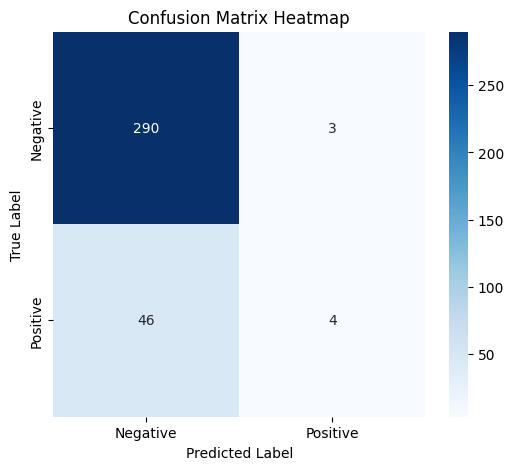

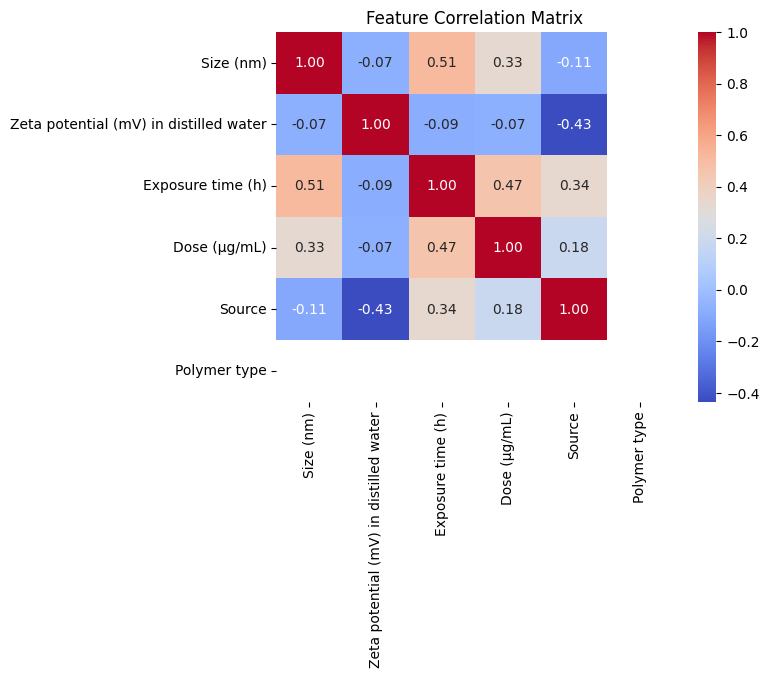

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3507954374400047
            Iterations: 33
            Function evaluations: 34
            Gradient evaluations: 33
Error in logistic regression fit: Singular matrix


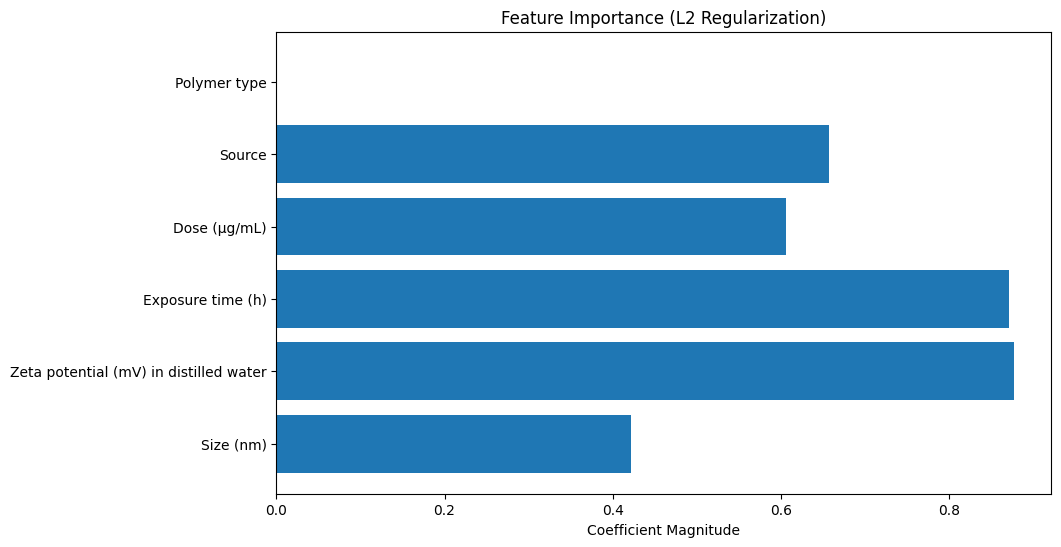

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import statsmodels.api as sm

# Step 1: Load the dataset
file_path = "/content/1-s2.0-S2772416622001310-mmc1 (1).xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Step 2: Data Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Article ID", "Particle ID", "Reference DOI"], errors='ignore')

# Convert "Zeta potential (mV) in distilled water" to numeric and handle missing values
df_cleaned["Zeta potential (mV) in distilled water"] = pd.to_numeric(
    df_cleaned["Zeta potential (mV) in distilled water"], errors="coerce"
)
df_cleaned = df_cleaned.dropna()  # Drop rows with missing values

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 3: Feature Selection
selected_features = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)", "Source", "Polymer type"]
X = df_cleaned[selected_features]
y = df_cleaned["Class"]

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Train Logistic Regression Model
log_reg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Step 8: Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")

# Step 9: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Step 10: Check Feature Multicollinearity
corr_matrix = pd.DataFrame(X_train, columns=selected_features).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 11: Fit Logistic Regression with Regularization (Fix Singular Matrix Issue)
X_train_const = sm.add_constant(X_train)  # Add intercept

try:
    logit_model = sm.Logit(y_train, X_train_const)
    result = logit_model.fit_regularized(method="l1")  # Use L1 regularization
    p_values = result.pvalues[1:]

    plt.figure(figsize=(10, 6))
    plt.barh(selected_features, p_values)
    plt.xlabel("P-value")
    plt.title("Feature Importance (P-values)")
    plt.show()
except Exception as e:
    print(f"Error in logistic regression fit: {e}")

# Step 12: Feature Importance using L2 Regularization
feature_importances = np.abs(log_reg.coef_).flatten()

plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance (L2 Regularization)")
plt.show()


In [ ]:
!pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 7.3 MB/s eta 0:00:00


Processing samples:   0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-11-4f11b594b4de>:94: DeprecationWarning: The model 'claude-3-sonnet-20240229' is deprecated and will reach end-of-life on July 21st, 2025.
Please migrate to a newer model. Visit https://docs.anthropic.com/en/docs/resources/model-deprecations for more information.
  response = client.messages.create(


Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:   2%|▏         | 1/50 [00:00<00:32,  1.50it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:   4%|▍         | 2/50 [00:01<00:30,  1.56it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:   6%|▌         | 3/50 [00:01<00:30,  1.56it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:   8%|▊         | 4/50 [00:02<00:29,  1.57it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  10%|█         | 5/50 [00:03<00:28,  1.58it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  12%|█▏        | 6/50 [00:03<00:27,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  14%|█▍        | 7/50 [00:04<00:26,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  16%|█▌        | 8/50 [00:05<00:26,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  18%|█▊        | 9/50 [00:05<00:25,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  20%|██        | 10/50 [00:06<00:25,  1.59it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  22%|██▏       | 11/50 [00:06<00:24,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  24%|██▍       | 12/50 [00:07<00:23,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  26%|██▌       | 13/50 [00:08<00:23,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  28%|██▊       | 14/50 [00:08<00:22,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  30%|███       | 15/50 [00:09<00:21,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  32%|███▏      | 16/50 [00:10<00:21,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  34%|███▍      | 17/50 [00:10<00:20,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  36%|███▌      | 18/50 [00:11<00:19,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  38%|███▊      | 19/50 [00:11<00:19,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  40%|████      | 20/50 [00:12<00:18,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  42%|████▏     | 21/50 [00:13<00:17,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  44%|████▍     | 22/50 [00:13<00:17,  1.63it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  46%|████▌     | 23/50 [00:14<00:16,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  48%|████▊     | 24/50 [00:14<00:16,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  50%|█████     | 25/50 [00:15<00:15,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  52%|█████▏    | 26/50 [00:16<00:16,  1.47it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  54%|█████▍    | 27/50 [00:17<00:15,  1.51it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  56%|█████▌    | 28/50 [00:17<00:14,  1.53it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  58%|█████▊    | 29/50 [00:18<00:13,  1.56it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  60%|██████    | 30/50 [00:18<00:12,  1.58it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  62%|██████▏   | 31/50 [00:19<00:11,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  64%|██████▍   | 32/50 [00:20<00:11,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  66%|██████▌   | 33/50 [00:20<00:10,  1.59it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  68%|██████▊   | 34/50 [00:21<00:09,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  70%|███████   | 35/50 [00:21<00:09,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  72%|███████▏  | 36/50 [00:22<00:08,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  74%|███████▍  | 37/50 [00:23<00:08,  1.61it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  76%|███████▌  | 38/50 [00:23<00:07,  1.62it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  78%|███████▊  | 39/50 [00:24<00:06,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  80%|████████  | 40/50 [00:25<00:06,  1.55it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  82%|████████▏ | 41/50 [00:25<00:05,  1.58it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  84%|████████▍ | 42/50 [00:26<00:06,  1.28it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  86%|████████▌ | 43/50 [00:27<00:05,  1.37it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  88%|████████▊ | 44/50 [00:28<00:04,  1.44it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  90%|█████████ | 45/50 [00:28<00:03,  1.49it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  92%|█████████▏| 46/50 [00:29<00:02,  1.54it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  94%|█████████▍| 47/50 [00:29<00:01,  1.56it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  96%|█████████▌| 48/50 [00:30<00:01,  1.58it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples:  98%|█████████▊| 49/50 [00:31<00:00,  1.60it/s]

Error calling Anthropic API: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}


Processing samples: 100%|██████████| 50/50 [00:31<00:00,  1.57it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Few-shot learning with Claude (using 50 samples)
Accuracy: 0.9200
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Average Confidence: 0.5000


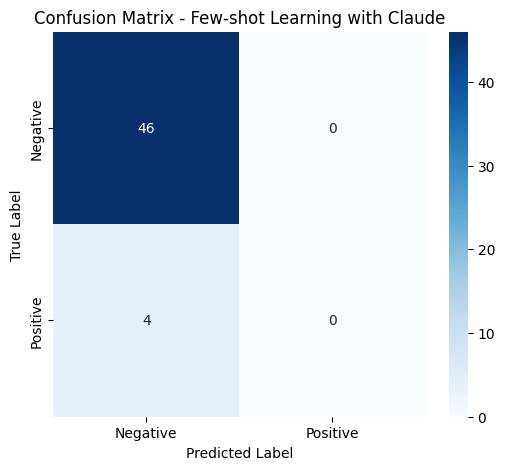

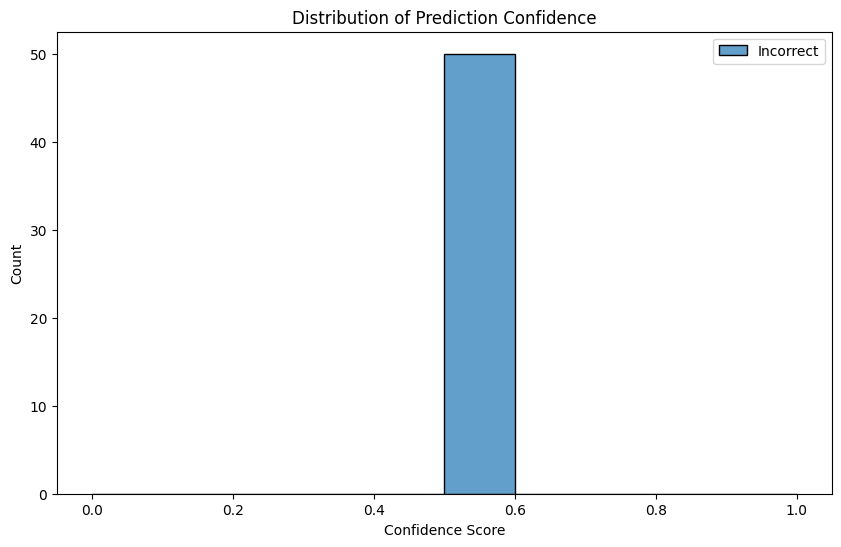

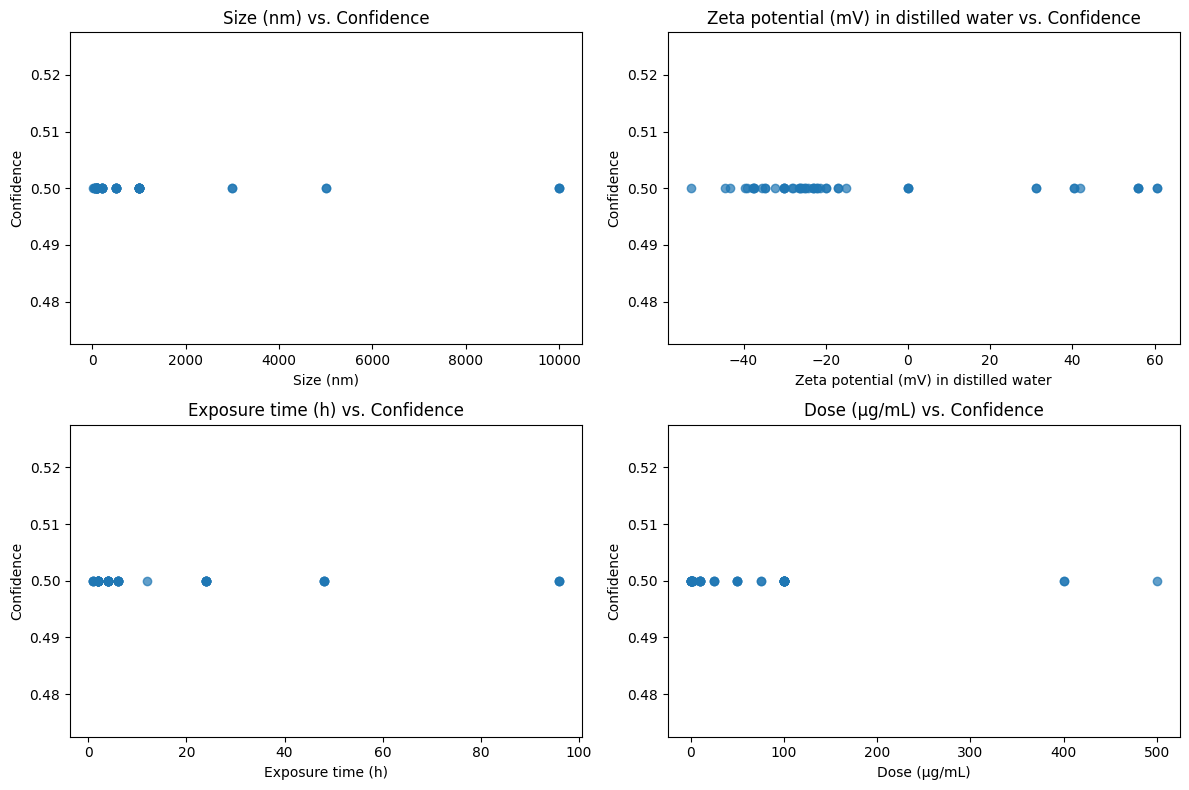

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import anthropic
import os
from tqdm import tqdm
import time
import json

# Step 1: Load the dataset
file_path = "/content/1-s2.0-S2772416622001310-mmc1 (1).xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Step 2: Data Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Article ID", "Particle ID", "Reference DOI"])

# Convert "Zeta potential (mV) in distilled water" to numeric and missing values to NaN
df_cleaned["Zeta potential (mV) in distilled water"] = pd.to_numeric(
    df_cleaned["Zeta potential (mV) in distilled water"], errors="coerce")

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Step 3: Feature Selection (Based on reference model)
selected_features = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)", "Source", "Polymer type"]
df_selected = df_cleaned[selected_features + ["Class"]]

# Step 4: Train-Test Split (70% Train, 30% Test)
train_df, test_df = train_test_split(df_selected, test_size=0.3, random_state=42, stratify=df_cleaned["Class"])

# Set up Anthropic API client
client = anthropic.Anthropic(
    api_key="API_KEY"  # Replace with your actual API key
)

# Define function for few-shot learning with Claude
def few_shot_classification(row, examples=8):
    """
    Classify nanoparticle toxicity using few-shot learning with Claude

    Parameters:
    row (pd.Series): Row containing feature values for the test sample
    examples (int): Number of examples to include in the prompt

    Returns:
    int: Predicted class (0 or 1)
    float: Confidence score (0-1)
    """

    # Create the prompt with examples from training data
    prompt = "You are classifying nanoparticle data to determine toxicity (0 for non-toxic, 1 for toxic).\n\n"
    prompt += "Here are some examples with known classifications:\n\n"

    # Add few-shot examples from training data (balanced examples)
    positive_examples = train_df[train_df["Class"] == 'Positive'].sample(examples // 2)
    negative_examples = train_df[train_df["Class"] == 'Negative'].sample(examples // 2)
    example_rows = pd.concat([positive_examples, negative_examples]).sample(frac=1)  # Shuffle examples

    for idx, ex_row in example_rows.iterrows():
        example_text = "Example:\n"
        example_text += f"- Size: {ex_row['Size (nm)']:.2f} nm\n"
        example_text += f"- Zeta potential: {ex_row['Zeta potential (mV) in distilled water']:.2f} mV\n"
        example_text += f"- Exposure time: {ex_row['Exposure time (h)']:.2f} h\n"
        example_text += f"- Dose: {ex_row['Dose (μg/mL)']:.2f} μg/mL\n"
        example_text += f"- Source: {ex_row['Source']}\n"
        example_text += f"- Polymer type: {ex_row['Polymer type']}\n"

        # Convert 'Positive' and 'Negative' to 1 and 0 respectively
        classification_value = 1 if ex_row['Class'] == 'Positive' else 0
        example_text += f"Classification: {classification_value}\n\n"

        prompt += example_text

    # Add the test case
    prompt += "Now classify this new nanoparticle:\n"
    prompt += f"- Size: {row['Size (nm)']:.2f} nm\n"
    prompt += f"- Zeta potential: {row['Zeta potential (mV) in distilled water']:.2f} mV\n"
    prompt += f"- Exposure time: {row['Exposure time (h)']:.2f} h\n"
    prompt += f"- Dose: {row['Dose (μg/mL)']:.2f} μg/mL\n"
    prompt += f"- Source: {row['Source']}\n"
    prompt += f"- Polymer type: {row['Polymer type']}\n\n"

    prompt += "Based on the examples, provide your classification in JSON format with two fields: 'prediction' (0 or 1) and 'confidence' (0.0-1.0)."

    system_message = "You are an expert in nanoparticle toxicology classification. Analyze patterns in the examples to predict toxicity of new samples."

    try:
        # Get completion from Anthropic Claude
        response = client.messages.create(
            model="claude-3-sonnet-20240229",
            max_tokens=100,
            temperature=0,
            system=system_message,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )

        # Extract the predicted class and confidence
        response_text = response.content[0].text.strip()

        # Try to parse JSON response
        try:
            # Look for JSON content in response
            import re
            json_match = re.search(r'\{.*\}', response_text, re.DOTALL)
            if json_match:
                json_str = json_match.group(0)
                result = json.loads(json_str)
                prediction = int(result.get('prediction', 0))
                confidence = float(result.get('confidence', 0.5))
                return prediction, confidence
            else:
                # If no JSON found, try to extract just the prediction
                for char in response_text:
                    if char in ["0", "1"]:
                        return int(char), 0.5
                return 0, 0.5  # Default
        except json.JSONDecodeError:
            # If JSON parsing fails, extract the first 0 or 1 in the response
            for char in response_text:
                if char in ["0", "1"]:
                    return int(char), 0.5
            return 0, 0.5  # Default

    except Exception as e:
        print(f"Error calling Anthropic API: {e}")
        # Default to 0 in case of error
        return 0, 0.5

# ... (rest of the code remains the same) ...

# Step 5: Make predictions
n_samples = min(50, len(test_df))  # Limit to 50 samples to reduce API costs
test_subset = test_df.sample(n_samples, random_state=42)

y_true = test_subset["Class"].map({"Negative": 0, "Positive": 1}).values # Convert y_true to numerical values
y_pred = []
confidences = []

# Create a results DataFrame to store all predictions and details
results_df = test_subset.copy()
results_df["predicted_class"] = None
results_df["confidence"] = None

# Process each row
for idx, row in tqdm(test_subset.iterrows(), total=len(test_subset), desc="Processing samples"):
    prediction, confidence = few_shot_classification(row, examples=8)

    y_pred.append(prediction)
    confidences.append(confidence)

    # Store results in the DataFrame
    results_df.at[idx, "predicted_class"] = prediction
    results_df.at[idx, "confidence"] = confidence

    time.sleep(0.5)  # Add delay to respect API rate limits

# Convert to numpy arrays
y_pred = np.array(y_pred)
confidences = np.array(confidences)

# Step 6: Compute Evaluation Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Few-shot learning with Claude (using {n_samples} samples)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Confidence: {np.mean(confidences):.4f}")

# Step 7: Plot Confusion Matrix Heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Few-shot Learning with Claude")
plt.savefig("claude_few_shot_confusion_matrix.png")
plt.show()

# Step 8: Plot Confidence Distribution by Prediction Correctness
results_df["correct_prediction"] = results_df["predicted_class"] == results_df["Class"]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=results_df,
    x="confidence",
    hue="correct_prediction",
    multiple="stack",
    bins=10,
    alpha=0.7
)
plt.title("Distribution of Prediction Confidence")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.legend(["Incorrect", "Correct"])
plt.savefig("claude_confidence_distribution.png")
plt.show()

# Step 9: Save results to CSV
results_df.to_csv("claude_few_shot_results.csv", index=False)

# Step 10: Analyze feature importance based on confidence
plt.figure(figsize=(12, 8))
feature_cols = ["Size (nm)", "Zeta potential (mV) in distilled water", "Exposure time (h)", "Dose (μg/mL)"]

for i, feature in enumerate(feature_cols):
    plt.subplot(2, 2, i+1)
    plt.scatter(results_df[feature], results_df["confidence"], alpha=0.7)
    plt.title(f"{feature} vs. Confidence")
    plt.xlabel(feature)
    plt.ylabel("Confidence")

plt.tight_layout()
plt.savefig("claude_feature_confidence.png")
plt.show()